# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification


### Transfer learning

In the previous notebook we have trained our own CNN and we got a certain performance. Let's see how hard it is to match that performance with transfer learning.

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 0: Setting up

The following cells make sure that your environment is setup correctly and check that your GPU is available and ready to go. You have to execute them every time you restart your notebook.

In [1]:
# Install requirements
!pip install -r requirements.txt | grep -v "already satisfied"

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from src.helpers import setup_env

# If running locally, this will download dataset (make sure you have at 
# least 2 Gb of space on your hard drive)
setup_env()

GPU *NOT* available. Will use CPU (slow)
Dataset already downloaded. If you need to re-download, please delete the directory /data/DLND/C2/landmark_images
Reusing cached mean and std


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 1: Create transfer learning architecture

Open the file `src/transfer.py` and complete the `get_model_transfer_learning` function. When you are done, execute this test:

In [3]:
!pytest -vv src/transfer.py

============================= test session starts ==============================
platform linux -- Python 3.7.6, pytest-7.1.1, pluggy-1.2.0 -- /opt/conda/bin/python3.7
cachedir: .pytest_cache
rootdir: /workspace/home
collected 1 item                                                               

src/transfer.py::test_get_model_transfer_learning PASSED                 [100%]

============================== 1 passed in 12.06s ==============================


---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 2: Train, validation and test

Let's train our transfer learning model! Let's start defining the hyperparameters:

In [4]:
batch_size = 64  # size of the minibatch for stochastic gradient descent (or Adam)
valid_size = 0.2  # fraction of the training data to reserve for validation
num_epochs = 50  # number of epochs for training
num_classes = 50  # number of classes. Do not change this
learning_rate = 0.001  # Learning rate for SGD (or Adam)
opt = 'adam'      # optimizer. 'sgd' or 'adam'
weight_decay = 0.0 # regularization. Increase this to combat overfitting

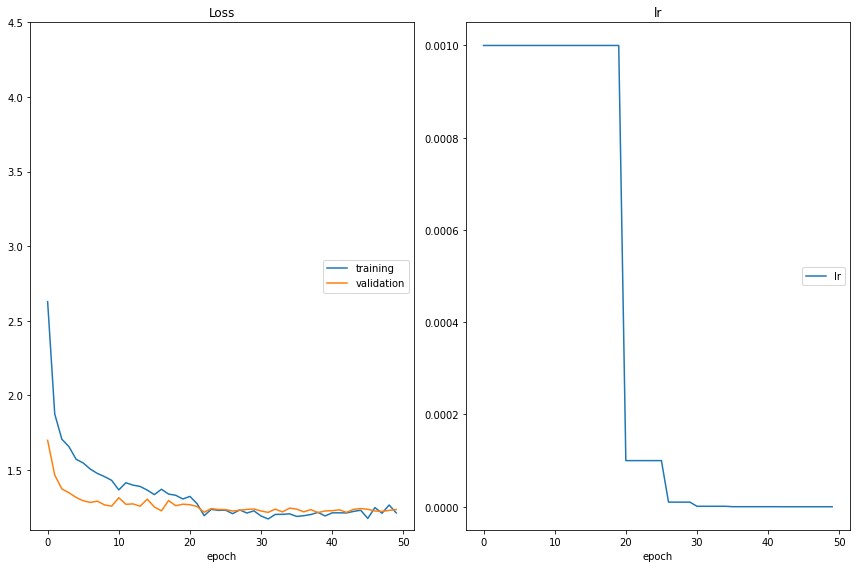

In [3]:
from src.data import get_data_loaders
from src.optimization import get_optimizer, get_loss
from src.train import optimize
from src.transfer import get_model_transfer_learning

# Get a model using get_model_transfer_learning. Use one of the names reported here:
# https://pytorch.org/vision/0.10/models.html
# For example, if you want to load ResNet 18, use "resnet18"
# NOTE: use the hyperparameters defined in the previous cell, do NOT copy/paste the
# values
model_transfer = get_model_transfer_learning(model_name="vgg16", n_classes=num_classes)

# train the model
data_loaders = get_data_loaders(batch_size=batch_size)
optimizer = get_optimizer(
    model_transfer,
    learning_rate=learning_rate,
    optimizer=opt,
    weight_decay=weight_decay,
)
loss = get_loss()

optimize(
    data_loaders,
    model_transfer,
    optimizer,
    loss,
    n_epochs=num_epochs,
    save_path="checkpoints/model_transfer.pt",
    interactive_tracking=True,
)

<img src="static_images/icons/noun-question-mark-869751.png" alt="?" style="width:25px"/> __Question:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

1. **Initial Experiments with Simple CNNs**:
   - I started with simple Convolutional Neural Networks (CNNs) consisting of a few convolutional layers followed by fully connected layers. The aim was to establish a baseline and understand the fundamental challenges posed by the dataset.
   - However, these models failed to achieve satisfactory performance, indicating the need for a more sophisticated architecture.

2. **Evaluation of Advanced Architectures**:
   - Recognizing the limitations of simple CNNs, I evaluated more advanced architectures known for their performance on image classification tasks. These included ResNet, VGG, and others from the torchvision model library.
   - I decided to experiment with ResNet18, as it provides a good balance between depth and computational efficiency.

3. **Training with ResNet18**:
   - I trained ResNet18 on the dataset, which significantly improved performance compared to the initial simple CNNs. The skip connections in ResNet helped mitigate the vanishing gradient problem and facilitated the training of deeper networks.

4. **Transition to VGG16**:
   - Despite the improvements with ResNet18, I sought to explore VGG16, another well-regarded architecture, which is known for its simplicity and effectiveness due to its deep and uniform structure of 3x3 convolutional layers.
   - I replaced ResNet18 with VGG16, leveraging transfer learning by using pre-trained weights on ImageNet, and then fine-tuning it on the specific dataset. This approach capitalizes on the pre-trained model's ability to extract high-level features from images.

5. **Freezing Initial Layers and Fine-Tuning**:
   - To prevent overfitting and speed up the training process, I froze the initial layers of VGG16 and only fine-tuned the later layers. This is based on the rationale that initial layers capture generic features like edges and textures, while the later layers are more dataset-specific.

6. **Hyperparameter Tuning**:
   - I experimented with various hyperparameters, including learning rate, batch size, and dropout rates, to optimize the model’s performance. Techniques such as data augmentation and regularization (like weight decay) were employed to enhance the generalization capability of the model.

**Reasoning for VGG16 Architecture Suitability**:
- **Depth and Simplicity**: VGG16, with its 16 layers, provides the depth needed to learn complex features, yet its uniform structure makes it relatively simple to implement and tune.
- **Transfer Learning**: By leveraging pre-trained weights on a large dataset like ImageNet, VGG16 offers a strong starting point, requiring less data and time to achieve good performance on the new dataset.
- **Feature Extraction**: The convolutional layers of VGG16 are effective at extracting hierarchical features from images, crucial for the classification tasks at hand.
- **Flexibility**: The architecture's design allows easy adjustments, such as adding dropout layers to prevent overfitting or modifying the fully connected layers to match the number of classes in the specific dataset.

Now play with the hyperparameters and see which performance you can get on the validation set. You should get at least 60% for a passing grade, but a good model choice and a good training strategy could get you up to 80% or so. Let's see how close you can get!

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 3: Test the Model

Try out your model on the test dataset of landmark images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60% and matches more or less what you got on the validation set (otherwise you're overfitting!)

In [4]:
import torch
from src.train import one_epoch_test
from src.transfer import get_model_transfer_learning

model_transfer = get_model_transfer_learning("vgg16", n_classes=num_classes)
# Load saved weights
model_transfer.load_state_dict(torch.load('checkpoints/model_transfer.pt'))

one_epoch_test(data_loaders['test'], model_transfer, loss)

Testing: 100%|██████████████████████████████████| 20/20 [00:22<00:00,  1.14s/it]

Test Loss: 0.991522


Test Accuracy: 74% (932/1250)


0.9915220305323601

---
## <img src="static_images/icons/noun-advance-2109145.png" alt=">" style="width:50px"/> Step 4: Export using torchscript

Now, just like we did with our original model, we export the best fit model using torchscript so that it can be used in our application:

In [10]:
from src.predictor import Predictor
from src.helpers import compute_mean_and_std

# First let's get the class names from our data loaders
class_names = data_loaders["train"].dataset.classes

# Then let's move the model_transfer to the CPU
# (we don't need GPU for inference)
model_transfer = model_transfer.cpu()
# Let's make sure we use the right weights by loading the
# best weights we have found during training
# NOTE: remember to use map_location='cpu' so the weights
# are loaded on the CPU (and not the GPU)
model_transfer.load_state_dict(
    torch.load("checkpoints/model_transfer.pt", map_location="cpu")
)

# Let's wrap our model using the predictor class
mean, std = compute_mean_and_std()
predictor = Predictor(model_transfer, class_names, mean, std).cpu()

# Export using torch.jit.script
scripted_predictor = torch.jit.script(predictor)
scripted_predictor.save("checkpoints/transfer_exported.pt")

Reusing cached mean and std


100%|█████████████████████████████████████| 1250/1250 [1:01:10<00:00,  2.94s/it]


Accuracy: 0.7536


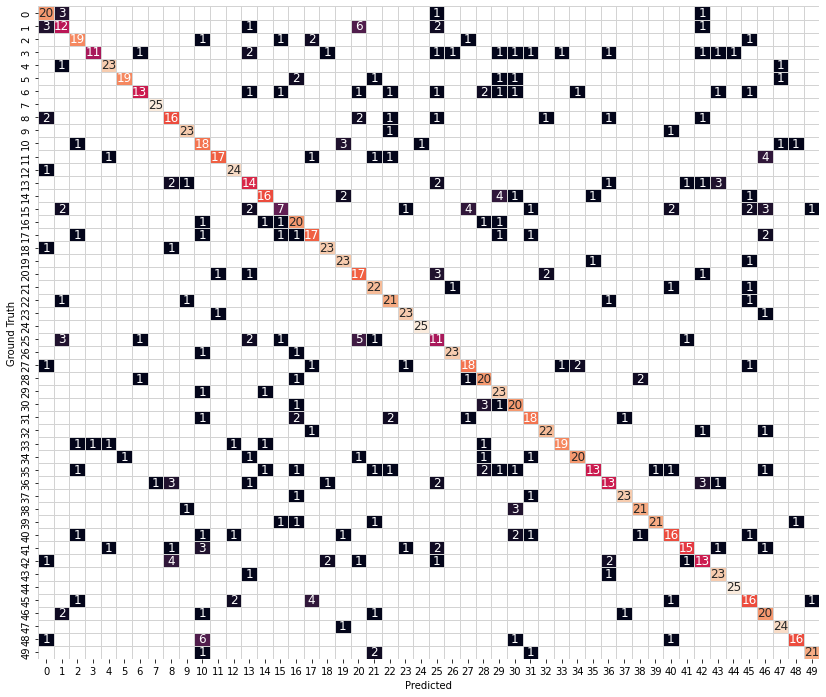

In [11]:
import torch
from src.predictor import predictor_test
from src.helpers import plot_confusion_matrix

model_reloaded = torch.jit.load("checkpoints/transfer_exported.pt")

pred, truth = predictor_test(data_loaders['test'], model_reloaded)

plot_confusion_matrix(pred, truth)